##                                               <center>Exercise</center>

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing correlation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("employee_db.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
def inverse_fun(x):
    if x == 1:
        return 0
    else:
        return 1


df["retention"] = df["left"].apply(inverse_fun)


In [6]:
correlations = df.corr(method="pearson")
correlations

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,retention
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,-0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,-0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.154622
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-1.000000
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.061788
retention,0.388375,-0.006567,-0.023787,-0.071287,-0.144822,0.154622,-1.000000,0.061788,1.000000


In [7]:
reten_corr = correlations.loc["retention", :]

cor_cols = ["retention"]

for i in range(len(reten_corr) - 1):
    if float(reten_corr[i]) < 0:
        continue
    else:
        cor_cols.append(reten_corr.index[i])
        print(f"Positive correlation between retention and {reten_corr.index[i]}")


cros_tab = pd.crosstab(df["salary"], df["retention"], margins=True)
cros_tab

Positive correlation between retention and satisfaction_level
Positive correlation between retention and Work_accident
Positive correlation between retention and promotion_last_5years


retention,0,1,All
salary,,,
high,82,1155,1237
low,2172,5144,7316
medium,1317,5129,6446
All,3571,11428,14999


In [8]:
my_map = {0: "Left", 1: "Stay"}
df["retention_val"] = df["retention"].map(my_map)

<AxesSubplot:xlabel='salary', ylabel='count'>

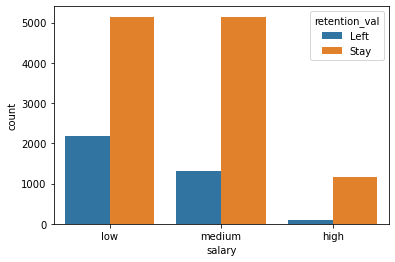

In [9]:
sns.countplot(data=df, x="salary", hue="retention_val")


In [10]:
cros_tab = pd.crosstab(df["Department"], df["retention"], margins=True)
cros_tab

retention,0,1,All
Department,,,
IT,273,954,1227
RandD,121,666,787
accounting,204,563,767
hr,215,524,739
management,91,539,630
marketing,203,655,858
product_mng,198,704,902
sales,1014,3126,4140
support,555,1674,2229


<AxesSubplot:xlabel='count', ylabel='Department'>

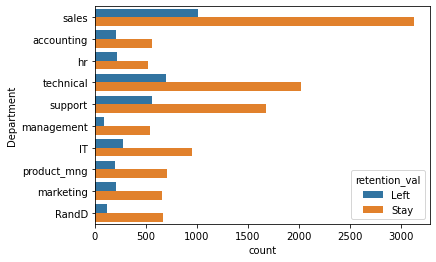

In [11]:
sns.countplot(data=df, y="Department", hue="retention_val")

In [12]:
df.drop(columns="retention_val", inplace=True)

In [13]:
cor_cols

['retention', 'satisfaction_level', 'Work_accident', 'promotion_last_5years']

In [14]:
df2 = df.filter(cor_cols)

ind_vars = cor_cols[1:]
dep_var = cor_cols[0]

X_train, X_test, y_train, y_test = train_test_split(df2[ind_vars], df2[dep_var], train_size=0.7)

m = LogisticRegression()
m.fit(X_train, y_train)
print(m.coef_ )
print(m.intercept_)
y_pred = m.predict(X_test)

R_2 = m.score(X_test, y_test)
print((R_2)*100)

[[3.69823683 1.54118512 1.27344519]]
[-1.06808474]
77.5111111111111
